# Wine quality data

In [1]:
# importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the 'winequality-white' dataset by using pandas library

WQdata = pd.read_csv(r"D:\iiit notes\Internship\16 season 2 jun-2021\winequality-white.csv", header = 0)
WQdata.head()

,response,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
0,4,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,4,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,4,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,4,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6


In [3]:
# Display the dataset information

WQdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3961 entries, 0 to 3960
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   response              3961 non-null   int64  
 1   fixed.acidity         3961 non-null   float64
 2   volatile.acidity      3961 non-null   float64
 3   citric.acid           3961 non-null   float64
 4   residual.sugar        3961 non-null   float64
 5   chlorides             3961 non-null   float64
 6   free.sulfur.dioxide   3961 non-null   float64
 7   total.sulfur.dioxide  3961 non-null   float64
 8   density               3961 non-null   float64
 9   pH                    3961 non-null   float64
 10  sulphates             3961 non-null   float64
 11  alcohol               3961 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 371.5 KB


In [4]:
# Display the unique values for each varaiable

WQdata.nunique()

response                  7
fixed.acidity            68
volatile.acidity        125
citric.acid              87
residual.sugar          310
chlorides               160
free.sulfur.dioxide     132
total.sulfur.dioxide    251
density                 890
pH                      103
sulphates                79
alcohol                 103
dtype: int64

In [5]:
# Display all values in the columns

for i in WQdata.columns:
    print(WQdata[i].value_counts())

4    1788
3    1175
5     689
2     153
6     131
1      20
7       5
Name: response, dtype: int64
6.80     241
6.60     238
6.40     224
6.90     191
6.70     190
        ... 
7.15       1
14.20      1
3.90       1
4.60       1
10.20      1
Name: fixed.acidity, Length: 68, dtype: int64
0.280    213
0.240    208
0.260    207
0.250    179
0.220    178
        ... 
0.815      1
0.685      1
0.750      1
0.690      1
1.005      1
Name: volatile.acidity, Length: 125, dtype: int64
0.30    239
0.28    220
0.32    214
0.34    181
0.29    179
       ... 
0.80      1
0.99      1
0.88      1
1.66      1
0.91      1
Name: citric.acid, Length: 87, dtype: int64
1.40     165
1.20     165
1.60     144
1.30     134
1.10     126
        ... 
9.05       1
18.30      1
5.55       1
5.95       1
6.75       1
Name: residual.sugar, Length: 310, dtype: int64
0.036    165
0.044    155
0.042    155
0.040    152
0.046    152
        ... 
0.217      1
0.112      1
0.114      1
0.186      1
0.104      1
Name: chl

In [6]:
# Identify the Target and Independent variable

IndepVar = []

for col in WQdata.columns:
    if col != 'response':
        IndepVar.append(col)
        
TargetVar = 'response'

x = WQdata[IndepVar]
y = WQdata[TargetVar]

In [7]:
# Split the dataset into train and test dataset

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

# Multiple logistic regression

In [8]:
# To build the 'Logistic Regression' model with random sampling 

from sklearn.linear_model import LogisticRegression 
WQdataLR = LogisticRegression(multi_class='multinomial', penalty='none', solver='newton-cg', random_state=0) 
WQdataLR = WQdataLR.fit(x_train,y_train)

In [9]:
# Predict the model with test data

y_pred = WQdataLR.predict(x_test)

In [10]:
# confusion matrix in sklearn

from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from math import sqrt

print(confusion_matrix(y_pred, y_test)) # Vertical is actual values & horizontal is predicted values

# Actual and predicted classes

lst_actual_class = y_test
lst_predicted_class = y_pred

# Class = Label 0-7

lst_classes = [1, 2, 3, 4, 5, 6, 7]

# Compute multi-class confusion matrix

arr_out_matrix = multilabel_confusion_matrix(lst_actual_class, lst_predicted_class, labels=lst_classes)

# Temp store results

model_acc = [];
model_recall = [];
model_prec = [];
model_fscore = [];
model_spec = [];
model_bal_acc = [];
model_mcc = [];
for no_class in range(len(lst_classes)):
    arr_data = arr_out_matrix[no_class];
    print("Print Class: {0}".format(no_class));

    tp = arr_data[1][1]
    fp = arr_data[0][1]
    tn = arr_data[0][0]
    fn = arr_data[1][0]

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);

    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    m = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(m), 3)
    model_acc.append(accuracy);
    model_prec.append(precision);
    model_recall.append(sensitivity);
    model_fscore.append(f1Score);
    model_spec.append(specificity);
    model_bal_acc.append(balanced_accuracy);
    model_mcc.append(MCC);

    print("TP={0}, FP={1}, TN={2}, FN={3}".format(tp, fp, tn, fn));
    print("Accuracy: {0}".format(accuracy)); # Accuracy score
    print("Precision: {0}".format(precision)); # Precision score
    print("Sensitivity: {0}".format(sensitivity)); # Recall score
    print("F1-Score: {0}".format(f1Score)); # F1 score
    print("Specificity: {0}".format(specificity)); # True Nagative Rate
    print("Balanced Accuracy: {0}".format(balanced_accuracy)); # Balance accuracy score
    print("MCC: {0}\n".format(MCC)); # Matthews Correlation Coefficient

[[  0   0   0   0   0   0   0]
 [  0   1   4   2   0   0   0]
 [  2  27 201 110  11   2   0]
 [  4  19 146 376 144  21   0]
 [  1   1   6  42  54  14   0]
 [  0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0]]
Print Class: 0
TP=0, FP=0, TN=1182, FN=7
Accuracy: 0.994
Precision: nan
Sensitivity: 0.0
F1-Score: 0.0
Specificity: 1.0
Balanced Accuracy: 0.5
MCC: nan

Print Class: 1
TP=1, FP=6, TN=1135, FN=47
Accuracy: 0.955
Precision: 0.143
Sensitivity: 0.021
F1-Score: 0.036
Specificity: 0.995
Balanced Accuracy: 0.508
MCC: 0.04

Print Class: 2
TP=201, FP=152, TN=680, FN=156
Accuracy: 0.741
Precision: 0.569
Sensitivity: 0.563
F1-Score: 0.566
Specificity: 0.817
Balanced Accuracy: 0.69
MCC: 0.382

Print Class: 3
TP=376, FP=334, TN=324, FN=155
Accuracy: 0.589
Precision: 0.53
Sensitivity: 0.708
F1-Score: 0.606
Specificity: 0.492
Balanced Accuracy: 0.6
MCC: 0.203

Print Class: 4
TP=54, FP=64, TN=916, FN=155
Accuracy: 0.816
Precision: 0.458
Sensitivity: 0.258
F1-Score: 0.33
Specificity: 0.93

In [11]:
# OVERALL - FINAL PREDICTION PERFORMANCE

# importing mean()

from statistics import mean
import math

print("Overall Performance Prediction:");
print("Accuracy: {0}%".format(round(mean(model_acc)*100, 4)));
print("Precision: {0}%".format(round(mean(model_prec)*100, 4)));
print("Recall or Sensitivity: {0}%".format(round(mean(model_recall)*100, 4)));
print("F1-Score: {0}".format(round(mean(model_fscore), 4)));
print("Specificity or True Nagative Rate: {0}%".format(round(mean(model_spec)*100, 4)));
print("Balanced Accuracy: {0}%\n".format(round(mean(model_bal_acc)*100, 4)));
print("MCC: {0}\n".format(round(mean(model_mcc), 4)));

Overall Performance Prediction:
Accuracy: 86.6143%
Precision: nan%
Recall or Sensitivity: nan%
F1-Score: 0.2197
Specificity or True Nagative Rate: 89.1143%
Balanced Accuracy: nan%

MCC: nan



# Decision Tree

In [12]:
# To build the decision tree model with random sampling

from sklearn.tree import DecisionTreeClassifier

WQdataDT = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
max_depth=3, max_features=None, max_leaf_nodes=None,
min_impurity_decrease=0.0, min_impurity_split=None,
min_samples_leaf=1, min_samples_split=2,min_weight_fraction_leaf=0.0,
random_state=None, splitter='best')

WQdataDT = WQdataDT.fit(x_train,y_train)

In [13]:
params1 = WQdataDT.get_params()
print(params1)

y1_pred = WQdataDT.predict(x_test)

# confusion matrix in sklearn

from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from math import sqrt

print(confusion_matrix(y_pred, y_test)) # Vertical is actual values & horizontal is predicted values

# Actual and predicted classes

lst_actual_class = y_test
lst_predicted_class = y1_pred

# Class = Label 0-7

lst_classes = [1, 2, 3, 4, 5, 6, 7]

# Compute multi-class confusion matrix

arr_out_matrix = multilabel_confusion_matrix(lst_actual_class, lst_predicted_class, labels=lst_classes)

# Temp store results

model_acc = [];
model_recall = [];
model_prec = [];
model_fscore = [];
model_spec = [];
model_bal_acc = [];
model_mcc = [];
for no_class in range(len(lst_classes)):
    arr_data = arr_out_matrix[no_class];
    print("Print Class: {0}".format(no_class));

    tp = arr_data[1][1]
    fp = arr_data[0][1]
    tn = arr_data[0][0]
    fn = arr_data[1][0]

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);

    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    m = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(m), 3)
    model_acc.append(accuracy);
    model_prec.append(precision);
    model_recall.append(sensitivity);
    model_fscore.append(f1Score);
    model_spec.append(specificity);
    model_bal_acc.append(balanced_accuracy);
    model_mcc.append(MCC);

    print("TP={0}, FP={1}, TN={2}, FN={3}".format(tp, fp, tn, fn));
    print("Accuracy: {0}".format(accuracy)); # Accuracy score
    print("Precision: {0}".format(precision)); # Precision score
    print("Sensitivity: {0}".format(sensitivity)); # Recall score
    print("F1-Score: {0}".format(f1Score)); # F1 score
    print("Specificity: {0}".format(specificity)); # True Nagative Rate
    print("Balanced Accuracy: {0}".format(balanced_accuracy)); # Balance accuracy score
    print("MCC: {0}\n".format(MCC)); # Matthews Correlation Coefficient

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
[[  0   0   0   0   0   0   0]
 [  0   1   4   2   0   0   0]
 [  2  27 201 110  11   2   0]
 [  4  19 146 376 144  21   0]
 [  1   1   6  42  54  14   0]
 [  0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0]]
Print Class: 0
TP=0, FP=0, TN=1182, FN=7
Accuracy: 0.994
Precision: nan
Sensitivity: 0.0
F1-Score: 0.0
Specificity: 1.0
Balanced Accuracy: 0.5
MCC: nan

Print Class: 1
TP=0, FP=0, TN=1141, FN=48
Accuracy: 0.96
Precision: nan
Sensitivity: 0.0
F1-Score: 0.0
Specificity: 1.0
Balanced Accuracy: 0.5
MCC: nan

Print Class: 2
TP=206, FP=178, TN=654, FN=151
Accuracy: 0.723
Precision: 0.536
Sensitivity: 0.577
F1-Score: 0.556
Specificity: 0.786
Balanced Accuracy: 0.682
MCC: 0.356

Pr

In [14]:
# OVERALL - FINAL PREDICTION PERFORMANCE

# importing mean()

from statistics import mean
import math

print("Overall Performance Prediction:");
print("Accuracy: {0}%".format(round(mean(model_acc)*100, 4)));
print("Precision: {0}%".format(round(mean(model_prec)*100, 4)));
print("Recall or Sensitivity: {0}%".format(round(mean(model_recall)*100, 4)));
print("F1-Score: {0}".format(round(mean(model_fscore), 4)));
print("Specificity or True Nagative Rate: {0}%".format(round(mean(model_spec)*100, 4)));
print("Balanced Accuracy: {0}%\n".format(round(mean(model_bal_acc)*100, 4)));
print("MCC: {0}\n".format(round(mean(model_mcc), 4)));

Overall Performance Prediction:
Accuracy: 85.5571%
Precision: nan%
Recall or Sensitivity: nan%
F1-Score: nan
Specificity or True Nagative Rate: 88.5143%
Balanced Accuracy: nan%

MCC: nan



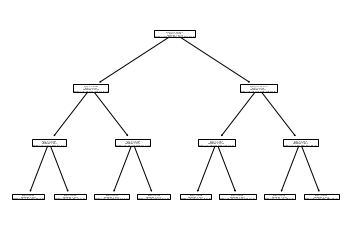

In [15]:
from sklearn import tree

tree.plot_tree(WQdataDT);

In [16]:
WQdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3961 entries, 0 to 3960
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   response              3961 non-null   int64  
 1   fixed.acidity         3961 non-null   float64
 2   volatile.acidity      3961 non-null   float64
 3   citric.acid           3961 non-null   float64
 4   residual.sugar        3961 non-null   float64
 5   chlorides             3961 non-null   float64
 6   free.sulfur.dioxide   3961 non-null   float64
 7   total.sulfur.dioxide  3961 non-null   float64
 8   density               3961 non-null   float64
 9   pH                    3961 non-null   float64
 10  sulphates             3961 non-null   float64
 11  alcohol               3961 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 371.5 KB


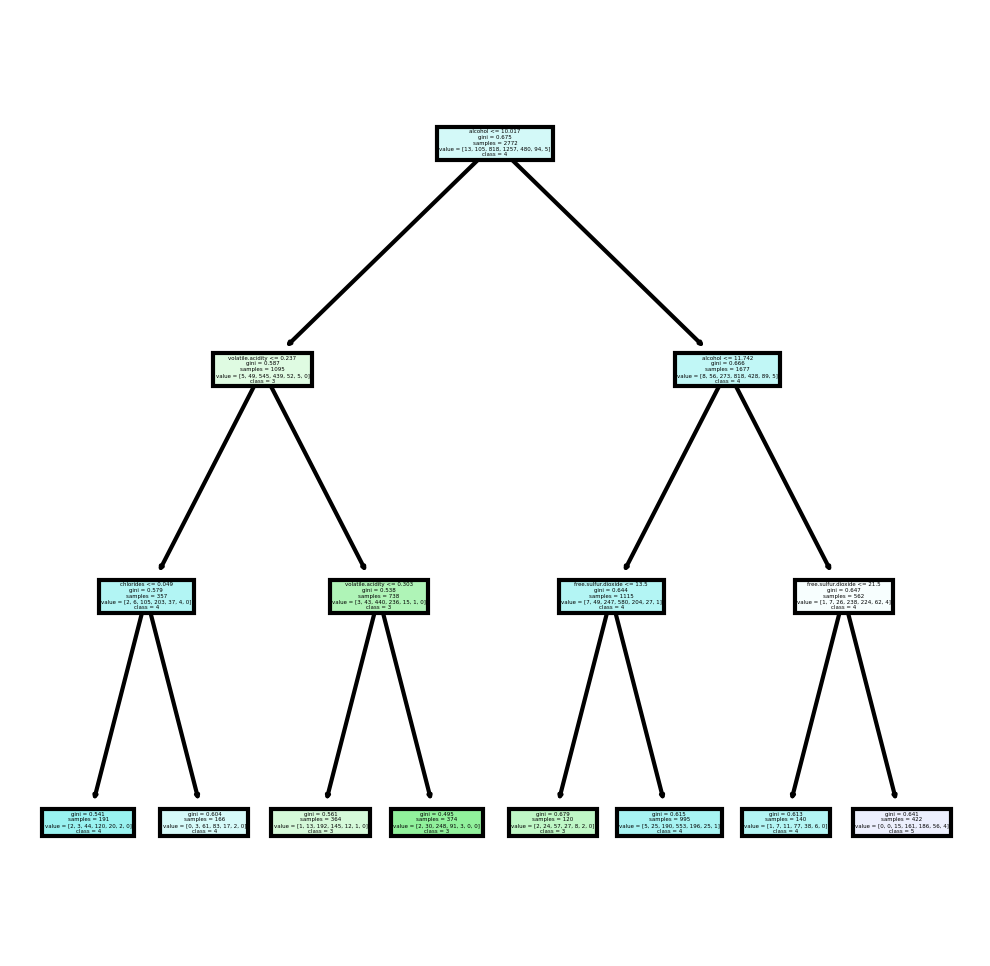

In [17]:
fn=['fixed.acidity','volatile.acidity','citric.acid','residual.sugar', 'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density', 'pH', 'sulphates','alcohol']
cn=['1', '2', '3', '4', '5', '6', '7']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(WQdataDT,
feature_names = fn,
class_names=cn,
filled = True);
fig.savefig('WQdataDT.png')